In [1]:
from fl_puf.FederatedDataset.PartitionTypes.representative import Representative
from fl_puf.FederatedDataset.PartitionTypes.balanced_and_unbalanced import (
    BalancedAndUnbalanced,
)

import torch
from fl_puf.FederatedDataset.Utils.utils import PartitionUtils
from DPL.Utils.dataset_utils import DatasetUtils
from fl_puf.Utils.utils import Utils
import pandas as pd
import matplotlib.pyplot as plt
from fl_puf.Utils.tabular_data_loader import prepare_tabular_data
from collections import Counter
import torch

/home/lcorbucci/fl_privacy_utility_fairness/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-17 11:36:18,892	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
train_set, test_set = DatasetUtils.download_dataset(
    "dutch",
    train_csv="dutch_census",
    debug=True,
    base_path="./data/Tabular/dutch/",
)

Using ['sex_binary'] as sensitive feature(s).


['age', 'household_position', 'household_size', 'prev_residence_place', 'citizenship', 'country_birth', 'edu_level', 'economic_status', 'cur_eco_activity', 'Marital_status', 'sex_binary']
Index(['age', 'household_position', 'household_size', 'prev_residence_place',
       'citizenship', 'country_birth', 'edu_level', 'economic_status',
       'cur_eco_activity', 'Marital_status', 'sex_binary',
       'occupation_binary'],
      dtype='object')
Using ['sex_binary'] as sensitive feature(s).
Data shapes: x=(60420, 10), y=(60420,), z=(60420,)
Mean of disparity 0.43932523995948297 - std 0.21071870095815304
{'counter_combination': {'(1, 0)': 68, '(0, 0)': 113}, 'counter_sens_features': {'0': 181}, 'counter_targets': {'1': 68, '0': 113}, 'client_disparity': 0.6243093922651933, 'unfair_client': 0}
{'counter_combination': {'(0, 1)': 82, '(0, 0)': 105, '(1, 0)': 64, '(1, 1)': 92}, 'counter_sens_features': {'1': 174, '0': 169}, 'counter_targets': {'0': 187, '1': 156}, 'client_disparity': 0.1500374

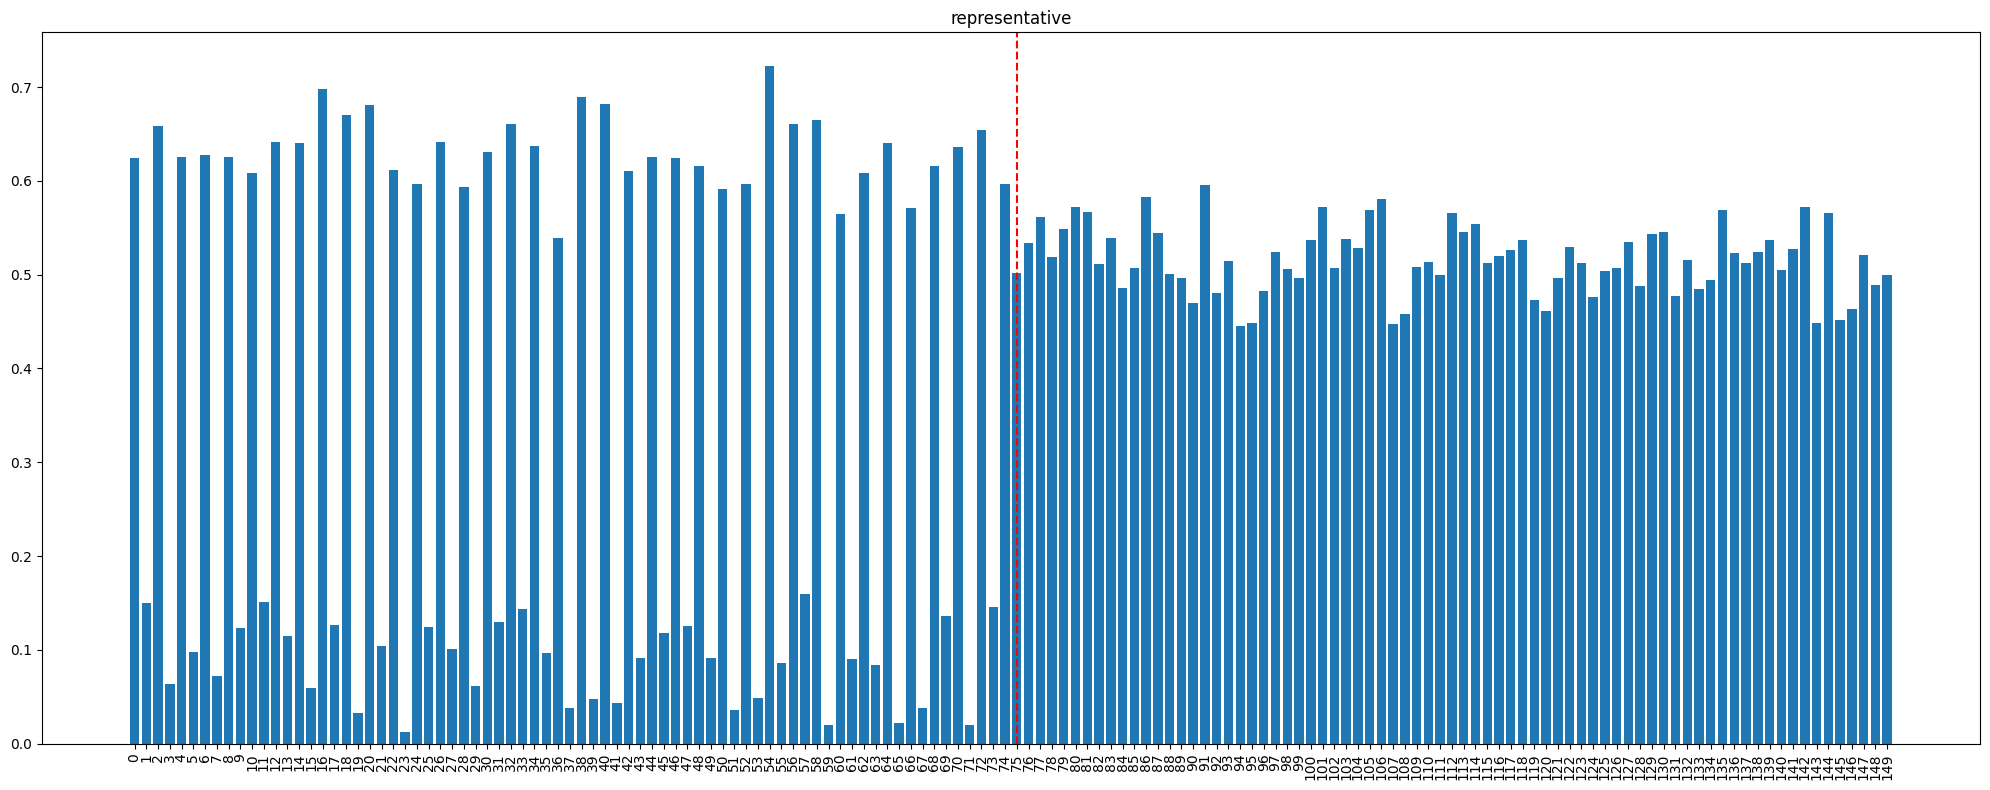

In [3]:
fed_dir, _ = prepare_tabular_data(
    dataset_path="./data/Tabular/dutch/",
    dataset_name="dutch",
    groups_balance_factor=None,
    priv_balance_factor=None,
    do_iid_split=True,
    approach="representative",
    num_nodes=150,
    ratio_unfair_nodes=0.5,
    opposite_direction=False,
    ratio_unfairness=(0.6, 0.8),
    group_to_reduce=(0, 1),
    group_to_increment=(1, 1),
    number_of_samples_per_node=343,
    opposite_group_to_reduce=None,
    opposite_group_to_increment=None,
    opposite_ratio_unfairness=None,
    ratio_one_group_nodes=1.0,
)

In [4]:
fed_dir

'./data/Tabular/dutch//federated'

In [5]:
partitions = []
for node_id in range(0, 150):
    try:
        node_data = torch.load(fed_dir + f"/{node_id}/train.pt")
        partitions.append(node_data)
    except:
        continue

In [6]:
clients_target_sensitive = []
combinations = []
for partition in partitions:
    targets = partition.targets
    sensitive = partition.gender
    clients_target_sensitive.append(
        [(target.item(), sv.item()) for target, sv in zip(targets, sensitive)]
    )

Counter({(0, 0): 113, (1, 0): 68})
Counter({(1, 1): 143, (0, 0): 112, (1, 0): 68, (0, 1): 20})


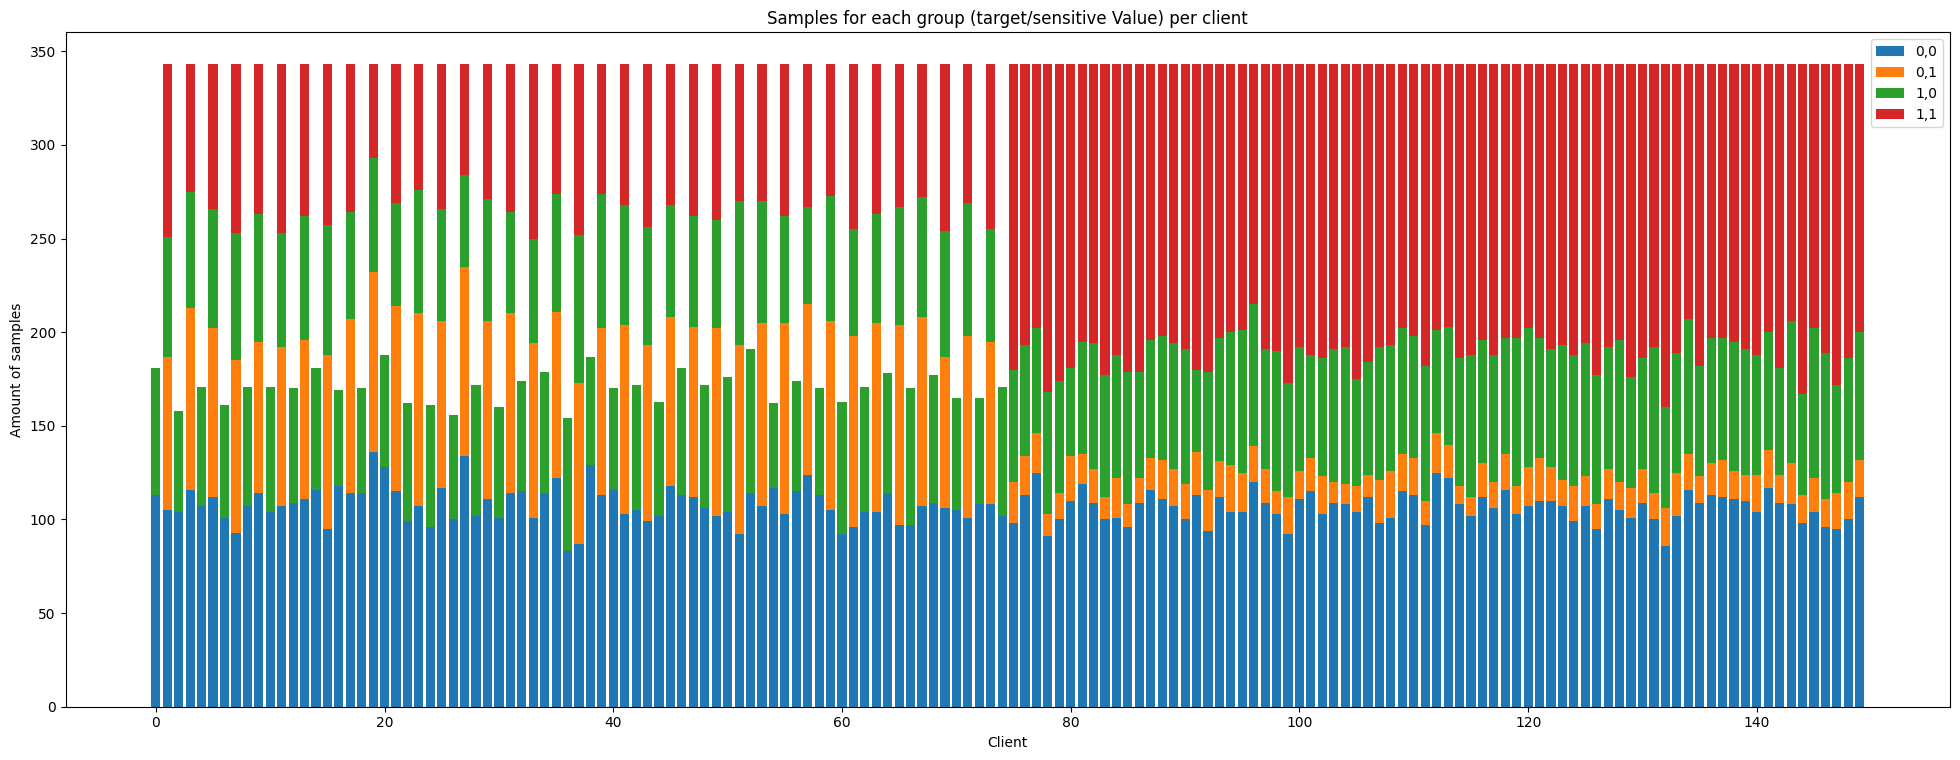

In [7]:
counter_groups = [Counter(client_data) for client_data in clients_target_sensitive]
print(counter_groups[0])
print(counter_groups[-1])
counter_group_0_0 = [counter[(0, 0.0)] for counter in counter_groups]
counter_group_0_1 = [counter[(0, 1.0)] for counter in counter_groups]
counter_group_1_0 = [counter[(1, 0.0)] for counter in counter_groups]
counter_group_1_1 = [counter[(1, 1.0)] for counter in counter_groups]

# plot a barplot with counter_group_0_0, counter_group_0_1, counter_group_1_0, counter_group_1_1
# for each client in the same plot
plt.figure(figsize=(20, 8))

plt.bar(range(len(counter_group_0_0)), counter_group_0_0)
plt.bar(range(len(counter_group_0_1)), counter_group_0_1, bottom=counter_group_0_0)
plt.bar(
    range(len(counter_group_1_0)),
    counter_group_1_0,
    bottom=[sum(x) for x in zip(counter_group_0_0, counter_group_0_1)],
)
plt.bar(
    range(len(counter_group_1_1)),
    counter_group_1_1,
    bottom=[
        sum(x) for x in zip(counter_group_0_0, counter_group_0_1, counter_group_1_0)
    ],
)


plt.xlabel("Client")
plt.ylabel("Amount of samples")
plt.title("Samples for each group (target/sensitive Value) per client")
plt.legend(["0,0", "0,1", "1,0", "1,1"])
# font size 20
plt.rcParams.update({"font.size": 20})
plt.tight_layout()

# group_to_reduce=(0,1), group_to_increment=(1,1),
# 0, 0 -> 1, 0

# Original

In [ ]:
celeba_df = pd.read_csv("./data/celeba/original_merged.csv")
celeba_df.shape

In [ ]:
labels = celeba_df["Smiling"].values
gender = celeba_df["Male"].values
combinations = [(label, gen) for label, gen in zip(labels, gender)]
combinations_with_index = [
    (label, gen, index) for index, (label, gen) in enumerate(zip(labels, gender))
]
counter_combinations = Counter(combinations)
counter_combinations

In [ ]:
# celeba_df.to_csv("./data/celeba/new_test_reduced.csv", index=False)

In [ ]:
train_set, test_set = DatasetUtils.download_dataset(
    "celeba",
    train_csv="original_merged",
    debug=True,
    base_path="./data/celeba",
)

In [ ]:
train_path = Utils.prepare_dataset_for_FL(
    dataset=train_set,
    dataset_name="celeba",
    base_path="./data",
)

In [ ]:
images, sensitive_attribute, labels = torch.load(train_path)
mapping = {-1: 0, 1: 1}
sensitive_attribute = torch.tensor([mapping[item] for item in sensitive_attribute])

idx = torch.tensor(list(range(len(images))))
dataset = [idx, sensitive_attribute, labels]
pool_size = 150
group_to_reduce = (1, 1)
group_to_increment = (0, 1)

In [ ]:
number_of_samples_per_node = None
ratio_unfair_nodes = 0.50
ratio_unfairness = (0, 0)
partitions_index_list, metadata = Representative.do_partitioning(
    labels=labels,
    sensitive_features=sensitive_attribute,
    num_partitions=pool_size,
    total_num_classes=2,
    group_to_reduce=group_to_reduce,
    group_to_increment=group_to_increment,
    number_of_samples_per_node=number_of_samples_per_node,
    ratio_unfair_nodes=ratio_unfair_nodes,
    ratio_unfairness=ratio_unfairness,
)
partitions = PartitionUtils.create_splitted_dataset_from_tuple(
    splitted_indexes=partitions_index_list,
    dataset=dataset,
)

In [ ]:
clients_target_sensitive = []
combinations = []
for partition in partitions:
    targets = partition[2]
    sensitive = partition[1]
    clients_target_sensitive.append(
        [(target.item(), sv.item()) for target, sv in zip(targets, sensitive)]
    )

In [ ]:
counter_groups = [Counter(client_data) for client_data in clients_target_sensitive]
print(counter_groups[0])
print(counter_groups[-1])
counter_group_0_0 = [counter[(0, 0.0)] for counter in counter_groups]
counter_group_0_1 = [counter[(0, 1.0)] for counter in counter_groups]
counter_group_1_0 = [counter[(1, 0.0)] for counter in counter_groups]
counter_group_1_1 = [counter[(1, 1.0)] for counter in counter_groups]

# plot a barplot with counter_group_0_0, counter_group_0_1, counter_group_1_0, counter_group_1_1
# for each client in the same plot
plt.figure(figsize=(20, 8))

plt.bar(range(len(counter_group_0_0)), counter_group_0_0)
plt.bar(range(len(counter_group_0_1)), counter_group_0_1, bottom=counter_group_0_0)
plt.bar(
    range(len(counter_group_1_0)),
    counter_group_1_0,
    bottom=[sum(x) for x in zip(counter_group_0_0, counter_group_0_1)],
)
plt.bar(
    range(len(counter_group_1_1)),
    counter_group_1_1,
    bottom=[
        sum(x) for x in zip(counter_group_0_0, counter_group_0_1, counter_group_1_0)
    ],
)


plt.xlabel("Client")
plt.ylabel("Amount of samples")
plt.title("Samples for each group (target/sensitive Value) per client")
plt.legend(["0,0", "0,1", "1,0", "1,1"])
# font size 20
plt.rcParams.update({"font.size": 20})
plt.tight_layout()

# group_to_reduce=(0,1), group_to_increment=(1,1),
# 0, 0 -> 1, 0

# Balanced and Unbalanced

In [ ]:
images, sensitive_attribute, labels = torch.load(train_path)
mapping = {-1: 0, 1: 1}
sensitive_attribute = torch.tensor([mapping[item] for item in sensitive_attribute])

idx = torch.tensor(list(range(len(images))))
dataset = [idx, sensitive_attribute, labels]
pool_size = 150
group_to_reduce = (1, 1)
group_to_increment = (0, 1)

In [ ]:
partitions_index_list, metadata = BalancedAndUnbalanced.do_partitioning(
    labels=labels,
    sensitive_features=sensitive_attribute,
    num_partitions=pool_size,
    total_num_classes=2,
    alpha=5,
    percentage_unbalanced_nodes=0.5,
    unbalanced_ratio=0.5,
)

In [ ]:
partitions = PartitionUtils.create_splitted_dataset_from_tuple(
    splitted_indexes=partitions_index_list,
    dataset=dataset,
)

In [ ]:
clients_target_sensitive = []
combinations = []
targets_nodes = []
sensitive_values_nodes = []
for partition in partitions:
    targets = partition[1]
    sensitive = partition[2]
    targets_nodes.append(targets)
    sensitive_values_nodes.append(sensitive)
    clients_target_sensitive.append(
        [(target.item(), sv.item()) for target, sv in zip(targets, sensitive)]
    )

In [ ]:
disparities = Representative.compute_disparities_debug(
    predictions=targets_nodes, sensitive_features=sensitive_values_nodes
)

In [ ]:
counter_groups = [Counter(client_data) for client_data in clients_target_sensitive]
print(counter_groups[0])
print(counter_groups[-1])
counter_group_0_0 = [counter[(0, 0.0)] for counter in counter_groups]
counter_group_0_1 = [counter[(0, 1.0)] for counter in counter_groups]
counter_group_1_0 = [counter[(1, 0.0)] for counter in counter_groups]
counter_group_1_1 = [counter[(1, 1.0)] for counter in counter_groups]

# plot a barplot with counter_group_0_0, counter_group_0_1, counter_group_1_0, counter_group_1_1
# for each client in the same plot
plt.figure(figsize=(20, 8))

plt.bar(range(len(counter_group_0_0)), counter_group_0_0)
plt.bar(range(len(counter_group_0_1)), counter_group_0_1, bottom=counter_group_0_0)
plt.bar(
    range(len(counter_group_1_0)),
    counter_group_1_0,
    bottom=[sum(x) for x in zip(counter_group_0_0, counter_group_0_1)],
)
plt.bar(
    range(len(counter_group_1_1)),
    counter_group_1_1,
    bottom=[
        sum(x) for x in zip(counter_group_0_0, counter_group_0_1, counter_group_1_0)
    ],
)


plt.xlabel("Client")
plt.ylabel("Amount of samples")
plt.title("Samples for each group (target/sensitive Value) per client")
plt.legend(["0,0", "0,1", "1,0", "1,1"])
# font size 20
plt.rcParams.update({"font.size": 20})
plt.tight_layout()

# group_to_reduce=(0,1), group_to_increment=(1,1),
# 0, 0 -> 1, 0